In [1]:
import os
import time
import torch
import math
import torchvision
from torchvision import transforms as transforms
from torch import nn
from torch.nn import functional as F
from math import cos,pi

import matplotlib.pyplot as plt
import numpy as np
import random

torch.cuda.empty_cache()

In [2]:
torch.cuda.is_available()

True

In [3]:
torch.manual_seed(17)

class HaS(object): 
#     def __init__(self):
        
    def __call__(self, img):
        # get width and height of the image
        img_= np.array(img).copy()
        s = img_.shape
        wd = s[0]
        ht = s[1]

        # possible grid size, 0 means no hiding
        grid_size=3

        # hiding probability
        hide_prob = 0.1
 
        # randomly choose one grid size
#         grid_size= grid_sizes[random.randint(0,len(grid_sizes)-1)]

        # hide the patches
        if(grid_size>0):
             for x in range(0,wd,grid_size):
                 for y in range(0,ht,grid_size):
                     x_end = min(wd, x+grid_size)  
                     y_end = min(ht, y+grid_size)
                     if(random.random() <=  hide_prob):
                           img_[x:x_end,y:y_end,:]=0

        return img_
    
torch.manual_seed(17)

        
# class HideEdge(object): 
#     def __init__(self,hide_size):
#         self.hide_size=hide_size
        
#     def __call__(self, img):
#         # get width and height of the image
#         img_= np.array(img).copy()
#         s = img_.shape
#         wd = s[0]
#         ht = s[1]

#         hide_size=self.hide_size
        
# #         img_[:,:,:] = img()
   
#         x_end = wd - hide_size 
#         y_end = ht - hide_size

#         img_[x_end:,y_end:,:]=0
# #         img_[x_end:,:hide_size,:]=0
# #         img_[:hide_size,y_end:,:]=0
#         img_[:hide_size,:hide_size,:]=0
# #         img_[x_end:,:,:]=0
# #         img_[:,y_end:,:]=0
# #         img_[:hide_size,:,:]=0
# #         img_[:,:hide_size,:]=0
# #         print(img_[x_end,y_end,:])
# #         print(img_[hide_size,hide_size,:])
# #         print(x_end,y_end,hide_size)
        
# #         mean = img_[hide_size:x_end-1,hide_size:y_end,:].mean()
# #         std = img_[hide_size:x_end-1,hide_size:y_end,:].std()
# #         print(mean, std)
# #         img_[hide_size:x_end-1,hide_size:y_end,:] = (img_[hide_size:x_end-1,hide_size:y_end,:] - mean) / std
# #         print(img_[hide_size:x_end-1,hide_size:y_end,:])
        
#         return img_

   
# class Hide_after_Norm(object): 
#     def __init__(self,hide_size):
#         self.hide_size=hide_size
        
#     def __call__(self, img_):
#         # get width and height of the image
# #         img_= np.array(img).copy()
#         s = img_.shape
#         wd = s[1]
#         ht = s[2]

#         hide_size=self.hide_size
        
# #         img_[:,:,:] = img()
   
#         x_end = wd - hide_size 
#         y_end = ht - hide_size
        
#         x_end = wd - hide_size 
#         y_end = ht - hide_size

#         img_[:,x_end:,y_end:]=0
# #         img_[x_end:,:hide_size,:]=0
# #         img_[:hide_size,y_end:,:]=0
#         img_[:,:hide_size,:hide_size]=0
# #         print(img_[x_end,y_end,:])
# #         print(img_[hide_size,hide_size,:])
# #         print(x_end,y_end,hide_size)
        
# #         mean = img_[hide_size:x_end-1,hide_size:y_end,:].mean()
# #         std = img_[hide_size:x_end-1,hide_size:y_end,:].std()
# #         print(mean, std)
# #         img_[hide_size:x_end-1,hide_size:y_end,:] = (img_[hide_size:x_end-1,hide_size:y_end,:] - mean) / std
# #         print(img_[hide_size:x_end-1,hide_size:y_end,:])
        
#         return img_
    
    

# # torch.cuda.manual_seed(17) # for GPU
# aug_train = transforms.Compose([
#     transforms.RandomHorizontalFlip(), # 水平翻转
# #     torchvision.transforms.CenterCrop(26),
# #     HideEdge(),
#     torchvision.transforms.RandomRotation(15),
# #     torchvision.transforms.CenterCrop(28),
#     # transforms.ColorJitter(brightness=0.5, contrast=0.5, saturation=0.5, hue=0.5), # color aug
# #     transforms.RandomCrop(32, padding=4), # 裁剪
#     # transforms.RandomResizedCrop((32,32),scale=(0.1,1),ratio=(0.5,2))
# #     hide_patch(),
# #     HaS(),
# #     HideEdge(2),
#     transforms.ToTensor(),
# #     Norm(2),
#     transforms.Normalize((0.4649, 0.4553, 0.4214), (0.2271, 0.2234, 0.2208)),# normalization
#     Hide_after_Norm(2)
#     ])

# aug_test = transforms.Compose([
#     transforms.ToTensor(),
#     transforms.Normalize((0.4649, 0.4553, 0.4214), (0.2271, 0.2234, 0.2208)), # normalization
#     Hide_after_Norm(2)
#     ])

# trainingdata = torchvision.datasets.CIFAR10('./CIFAR10',train=True,download=True,transform=aug_train)
# # testdata = torchvision.datasets.CIFAR10('./CIFAR10',train=False,download=True,transform=transforms.ToTensor())
# # print(len(trainingdata),len(testdata))

In [4]:
torch.manual_seed(17)
torch.cuda.manual_seed_all(17)

aug_train = transforms.Compose([
    transforms.RandomCrop(32,padding=4,padding_mode='reflect'),
    transforms.RandomHorizontalFlip(), # 水平翻转
    transforms.ToTensor(),
    transforms.Normalize((0.4244, 0.4146, 0.3836), (0.2539, 0.2491, 0.2420)) # normalization
    ])

aug_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4244, 0.4146, 0.3836), (0.2539, 0.2491, 0.2420)) # normalization
    ])

trainingdata = torchvision.datasets.CIFAR10('./CIFAR10',train=True,download=True,transform=aug_train)

Files already downloaded and verified


In [5]:
def get_mean_and_std(dataset):
  '''Compute the mean and std value of dataset.'''
  dataloader = torch.utils.data.DataLoader(dataset, batch_size=1, shuffle=True, num_workers=2)
  mean = torch.zeros(3)
  std = torch.zeros(3)
  print('==> Computing mean and std..')
  for inputs, targets in dataloader:
      for i in range(3):
          mean[i] += inputs[:,i,:,:].mean()
          std[i] += inputs[:,i,:,:].std()
  mean.div_(len(dataset))
  std.div_(len(dataset))
  return mean, std

def load_data(is_train,aug,batch_size):
  dataset = torchvision.datasets.CIFAR10('./CIFAR10',train=is_train,download=True,transform=aug)
#   mean, std = get_mean_and_std(dataset)
#   print(mean, std)
  dataloader = torch.utils.data.DataLoader(dataset,batch_size=batch_size,shuffle=is_train)
  return dataloader

batch_size = 128 # param
trainDataLoader = load_data(is_train=True,aug=aug_train,batch_size=batch_size)
testDataLoader = load_data(is_train=False,aug=aug_test,batch_size=batch_size)

Files already downloaded and verified
Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([3, 32, 32]) 6
[[[-0.9147032  -0.38956204  0.0274618  ...  0.01201648  0.18191507
    0.15102442]
  [-0.32778072 -0.03431951  0.10468844 ... -0.21966343  0.1973604
    0.2591417 ]
  [-0.09610081  0.29003236  0.24369638 ... -0.6366873  -0.51312464
   -0.32778072]
  ...
  [ 1.0931895   1.2321974   1.448432   ...  0.22825105  0.66072035
    1.6646665 ]
  [ 1.2013068   1.3248694   1.3866507  ... -0.38956204 -0.17332745
    1.1704161 ]
  [ 1.3866507   1.2785335   1.1549708  ... -0.8529219  -0.8065859
    0.7997283 ]]

 [[-1.2393323  -0.8772444  -0.53089947 ... -0.5151565  -0.3419841
   -0.3419841 ]
  [-0.8142726  -0.6725861  -0.5623854  ... -0.68832904 -0.32624117
   -0.29475525]
  [-0.6411001  -0.42069885 -0.45218474 ... -1.003188   -0.9244732
   -0.76704377]
  ...
  [ 0.57110703  0.6813077   0.9804237  ... -0.21604052  0.19327614
    1.2323109 ]
  [ 0.6025929   0.74427944  0.8229942  ... -0.83001554 -0.68832904
    0.6655647 ]
  [ 0.87022305  0.8072512   0.6340788  ... -1.12913

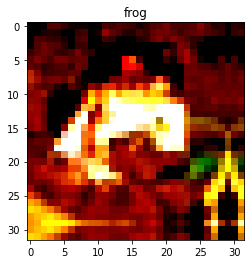

In [6]:
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

image,label = trainingdata[0]
image_= np.array(image).copy()
print(image.shape, label)
print(image_)

%matplotlib inline
plt.imshow(image.numpy().transpose(1,2,0))
plt.title(str(classes[label]))
plt.show()

In [7]:
# trainDataLoader = torch.utils.data.DataLoader(trainingdata,batch_size=batch_size,shuffle=True)
# testDataLoader = torch.utils.data.DataLoader(testdata,batch_size=batch_size,shuffle=False)

# images, labels = iter(trainDataLoader).next()
# plt.figure(figsize=(17,8))
# for index in np.arange(0,5):
#   plt.subplot(1,5,index+1)
#   plt.imshow(images[index].numpy().transpose(1,2,0))
#   plt.title(str(classes[labels[index]]))

def get_mean_and_std(dataset):
  '''Compute the mean and std value of dataset.'''
  dataloader = torch.utils.data.DataLoader(dataset, batch_size=1, shuffle=True, num_workers=2)
  mean = torch.zeros(3)
  std = torch.zeros(3)
  print('==> Computing mean and std..')
  for inputs, targets in dataloader:
      for i in range(3):
          mean[i] += inputs[:,i,:,:].mean()
          std[i] += inputs[:,i,:,:].std()
  mean.div_(len(dataset))
  std.div_(len(dataset))
  return mean, std


In [8]:
class BasicBlock(nn.Module):

    def __init__(self, in_planes, planes, stride=1):
        super(BasicBlock, self).__init__()
        self.conv1 = nn.Conv2d(
            in_planes, planes, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(planes)
        self.conv2 = nn.Conv2d(planes, planes, kernel_size=3,
                               stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(planes)

        self.shortcut = nn.Sequential()
        if stride != 1 or in_planes != planes:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_planes, planes,
                          kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(planes)
            )

    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.bn2(self.conv2(out))
        out += self.shortcut(x)
        out = F.relu(out)
        return out



class ResNet(nn.Module):
    def __init__(self, in_planes, block, num_blocks, num_classes=10):
        super(ResNet, self).__init__()
        self.in_planes = in_planes

        self.conv1 = nn.Conv2d(3, self.in_planes, kernel_size=3,
                               stride=1, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(self.in_planes)
        self.layer1 = self._make_layer(block, in_planes, num_blocks[0], stride=1)
        self.layer2 = self._make_layer(block, in_planes*2, num_blocks[1], stride=2)
        self.layer3 = self._make_layer(block, in_planes*4, num_blocks[2], stride=2)
#         self.layer4 = self._make_layer(block, in_planes*8, num_blocks[3], stride=2)
#         self.layer1 = self._make_layer(block, 64, num_blocks[0], stride=1)
#         self.layer2 = self._make_layer(block, 128, num_blocks[1], stride=2)
#         self.layer3 = self._make_layer(block, 256, num_blocks[2], stride=2)
#         self.layer4 = self._make_layer(block, self.in_planes*8, num_blocks[3], stride=2)
        self.linear = nn.Linear(256, num_classes)

    def _make_layer(self, block, planes, num_blocks, stride):
        strides = [stride] + [1]*(num_blocks-1)
        layers = []
        for stride in strides:
            layers.append(block(self.in_planes, planes, stride))
            self.in_planes = planes
        return nn.Sequential(*layers)

    def forward(self, x):
#         print(x.shape)
        out = F.relu(self.bn1(self.conv1(x)))
#         print(out.shape)
        out = self.layer1(out)
#         print(out.shape)
        out = self.layer2(out)
#         print(out.shape)
        out = self.layer3(out)
#         print(out.shape)
#         out = self.layer4(out)
        out = F.avg_pool2d(out, 8)
#         print(out.shape)
        out = out.view(out.size(0), -1)
#         print(out.shape)
        out = self.linear(out)
        return out
    
    def init_weights(self):
        for m in self.modules():
            if isinstance(m,nn.Conv2d):
                nn.init.kaiming_normal_(m.weight,mode='fan_out',nonlinearity='relu') # weight initialization
                if m.bias is not None:
                    nn.init.constant_(m.bias,0)
            elif isinstance(m,nn.BatchNorm2d):
                nn.init.constant_(m.weight,1)
                nn.init.constant_(m.bias,0)
            elif isinstance(m,nn.Linear):
                nn.init.normal_(m.weight,std=1e-3)
                if m.bias is not None:
                    nn.init.constant_(m.bias,0)

def project1_model():
#     return ResNet(BasicBlock, [2, 2, 2, 2])
#     return ResNet(BasicBlock, [2, 2, 2])
    return ResNet(64, BasicBlock, [3, 3, 3])

# model1 = nn.Sequential(project1_model(), nn.AdaptiveAvgPool2d((1,1)), nn.Flatten(), nn.Linear(512, 10)).cuda()
model1 = project1_model().cuda()
model1.init_weights()

In [9]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)
    # torch.numel() returns number of elements in a tensor

print(count_parameters(model1))

4327754


In [10]:
def adjust_learning_rate(optimizer, current_epoch,max_epoch,lr_min=0,lr_max=0.1,warmup=True):
    warmup_epoch = 10 if warmup else 0
    if current_epoch < warmup_epoch:
        lr = lr_max * current_epoch / warmup_epoch
    else:
        lr = lr_min + (lr_max-lr_min)*(1 + cos(pi * (current_epoch - warmup_epoch) / (max_epoch - warmup_epoch))) / 2
    for param_group in optimizer.param_groups:
        param_group['lr'] = lr

In [11]:
# X = torch.rand(size=(1, 3, 32, 32)).cuda()
# for layer in model1:
#   X = layer(X)
#   print(layer.__class__.__name__,'output shape:\t', X.shape)

In [12]:
num_epochs = 5000 # param
epoch_start = 0
# path = 'adam_rotate_center_crop1.pt'
# path = 'block_3.pt'
path = 'batch_128_lr_0.1_no_crop_decay_avg_8.pt'

train_loss_history = []
test_loss_history = []
test_accuracy_history = []
train_accuracy_history = []

Loss = torch.nn.CrossEntropyLoss()
lr = 0.1 # param
lr_min=0.001
# optimizer = torch.optim.SGD(model1.parameters(),lr=lr,momentum=0.9,weight_decay=5e-4) # changable optimizer
# optimizer = torch.optim.SGD(model1.parameters(),lr=lr,momentum=0.9) # changable optimizer
# optimizer = torch.optim.Adam(model1.parameters(),lr=lr, betas=(0.9,0.999), eps=1e-08, amsgrad=False) # changable optimizer
momentum = 0.9
nesterov = True
optimizer = torch.optim.SGD(model1.parameters(),lr=lr,momentum=momentum,nesterov=nesterov)

# torch.cuda.empty_cache()

if os.path.exists(path):
  checkpoint = torch.load(path)
  print('Read model from checkpoint')
  model1.cuda().load_state_dict(checkpoint['model_state_dict'])
  optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
  epoch_start = checkpoint['epoch']
  Loss = checkpoint['Loss']
  train_loss_history = checkpoint['train_loss_history']
  test_loss_history = checkpoint['test_loss_history']
  test_accuracy_history = checkpoint['test_accuracy_history']
  train_accuracy_history = checkpoint['train_accuracy_history']
  print('Restart from epoch',epoch_start)
    

for epoch in range(epoch_start+1, num_epochs + 1):
  timestart = time.time()

  train_loss = 0.0
  test_loss = 0.0
  test_accuracy = 0.0
  train_accuracy = 0.0

  for i, data in enumerate(trainDataLoader):
    images, labels = data
    images = images.cuda()
    labels = labels.cuda()
    optimizer.zero_grad()
    predicted_output = model1.cuda()(images)
    fit = Loss(predicted_output,labels)
    fit.backward()
    adjust_learning_rate(optimizer=optimizer,current_epoch=epoch,max_epoch=num_epochs,lr_min=lr_min,lr_max=lr,warmup=True)
    optimizer.step()
    train_loss += fit.item()
    train_accuracy += (torch.eq(torch.max(predicted_output,1)[1],labels).sum()/len(labels)*100).data.cpu().numpy()

  for i, data in enumerate(testDataLoader):
    with torch.no_grad():
      images, labels = data
      images = images.cuda()
      labels = labels.cuda()
      predicted_output = model1.cuda()(images)
      fit = Loss(predicted_output,labels)
      test_loss += fit.item()
      test_accuracy += (torch.eq(torch.max(predicted_output,1)[1],labels).sum()/len(labels)*100).data.cpu().numpy()


  train_loss = train_loss/len(trainDataLoader)
  test_loss = test_loss/len(testDataLoader)
  test_accu = test_accuracy/len(testDataLoader)
  train_accu = train_accuracy/len(trainDataLoader)
  train_loss_history.append(train_loss)
  test_loss_history.append(test_loss)
  test_accuracy_history.append(test_accu)
  train_accuracy_history.append(train_accu)
  print('Epoch %s, Train loss %s, Test loss %s, Train accuracy %s, Test accuracy %s, Cost %s s'%(epoch,
                                                                                                   train_loss,test_loss,
                                                                                                   train_accu,test_accu,
                                                                                                   time.time()-timestart))
  
  if epoch % 5 == 0 and epoch != 0:
    torch.save({'epoch':epoch,
          'model_state_dict':model1.cuda().state_dict(),
          'optimizer_state_dict':optimizer.state_dict(),
          'Loss':Loss,
          'train_loss_history':train_loss_history,
          'test_loss_history':test_loss_history,
          'test_accuracy_history':test_accuracy_history,
          'train_accuracy_history':train_accuracy_history},path)
    print('Model saved in epoch %s'%(epoch))

Read model from checkpoint
Restart from epoch 325
Epoch 326, Train loss 0.0017414851550342637, Test loss 0.44833186231082, Train accuracy 99.94005754475704, Test accuracy 93.5818829113924, Cost 55.14473795890808 s
Epoch 327, Train loss 0.0029443418510397613, Test loss 0.44901389208964154, Train accuracy 99.90009590792839, Test accuracy 93.74011075949367, Cost 52.40464544296265 s
Epoch 328, Train loss 0.0021928712389989277, Test loss 0.4242858966765336, Train accuracy 99.9320652173913, Test accuracy 93.8192246835443, Cost 52.292545795440674 s
Epoch 329, Train loss 0.001731949757408879, Test loss 0.4340415384761895, Train accuracy 99.94804987212277, Test accuracy 93.97745253164557, Cost 52.407655239105225 s
Epoch 330, Train loss 0.0027390775534078256, Test loss 0.4388584145875294, Train accuracy 99.91208439897699, Test accuracy 93.67088607594937, Cost 52.20355415344238 s
Model saved in epoch 330
Epoch 331, Train loss 0.0013490981146904702, Test loss 0.44086776301264763, Train accuracy 99

Epoch 374, Train loss 0.0020704551898466667, Test loss 0.4623698247007177, Train accuracy 99.91807864450128, Test accuracy 93.53243670886076, Cost 52.29822278022766 s
Epoch 375, Train loss 0.0015374836230814895, Test loss 0.4524967216804058, Train accuracy 99.95004795396419, Test accuracy 93.67088607594937, Cost 52.434584617614746 s
Model saved in epoch 375
Epoch 376, Train loss 0.0010914534802539428, Test loss 0.4623015287178981, Train accuracy 99.96003836317135, Test accuracy 93.54232594936708, Cost 52.466033935546875 s
Epoch 377, Train loss 0.0016945481922907488, Test loss 0.46438001332026496, Train accuracy 99.94804987212277, Test accuracy 93.87856012658227, Cost 52.457789182662964 s
Epoch 378, Train loss 0.0015233850695467435, Test loss 0.4520355568184883, Train accuracy 99.9440537084399, Test accuracy 93.73022151898734, Cost 52.427329540252686 s
Epoch 379, Train loss 0.0009735541941957883, Test loss 0.4649343009613737, Train accuracy 99.97202685421995, Test accuracy 93.6115506329

Epoch 422, Train loss 0.0010716060215148824, Test loss 0.48589068144276926, Train accuracy 99.95204603580562, Test accuracy 93.71044303797468, Cost 52.19697332382202 s
Epoch 423, Train loss 0.001140615485972101, Test loss 0.5157960495805438, Train accuracy 99.9560421994885, Test accuracy 93.42365506329114, Cost 52.14276194572449 s
Epoch 424, Train loss 0.0007603279947414047, Test loss 0.48369522701618795, Train accuracy 99.97602301790282, Test accuracy 93.73022151898734, Cost 52.194681882858276 s
Epoch 425, Train loss 0.0005176199377406174, Test loss 0.47546627865279023, Train accuracy 99.98201726342711, Test accuracy 93.77966772151899, Cost 52.17637348175049 s
Model saved in epoch 425
Epoch 426, Train loss 0.0008248068043277943, Test loss 0.4862956246714803, Train accuracy 99.9708280051151, Test accuracy 93.59177215189874, Cost 52.26230788230896 s
Epoch 427, Train loss 0.0006768301280826365, Test loss 0.48564576102962975, Train accuracy 99.97802109974424, Test accuracy 93.868670886075

Epoch 470, Train loss 0.0003784649434592961, Test loss 0.48230140818919565, Train accuracy 99.99000959079284, Test accuracy 93.61155063291139, Cost 52.393768548965454 s
Model saved in epoch 470
Epoch 471, Train loss 0.00040124384563291365, Test loss 0.48450591966887063, Train accuracy 99.9880115089514, Test accuracy 93.78955696202532, Cost 52.20950961112976 s
Epoch 472, Train loss 0.0006106181812514472, Test loss 0.4792828829015923, Train accuracy 99.97802109974424, Test accuracy 93.6807753164557, Cost 52.506916761398315 s
Epoch 473, Train loss 0.0006211722771873294, Test loss 0.4754684666478181, Train accuracy 99.98601342710998, Test accuracy 93.72033227848101, Cost 52.39334535598755 s
Epoch 474, Train loss 0.0003884475593564622, Test loss 0.46886498412070204, Train accuracy 99.98601342710998, Test accuracy 93.6807753164557, Cost 52.341275453567505 s
Epoch 475, Train loss 0.0004883522411765088, Test loss 0.46906194043687627, Train accuracy 99.98601342710998, Test accuracy 93.552215189

Epoch 518, Train loss 0.0002199000031395972, Test loss 0.5090841087453728, Train accuracy 99.99400575447571, Test accuracy 93.89833860759494, Cost 52.40589261054993 s
Epoch 519, Train loss 0.00023955605712128395, Test loss 0.49960586018388786, Train accuracy 99.99000959079284, Test accuracy 93.90822784810126, Cost 52.409905433654785 s
Epoch 520, Train loss 0.00022380495053399743, Test loss 0.5020302129037018, Train accuracy 99.99000959079284, Test accuracy 93.8488924050633, Cost 52.44777703285217 s
Model saved in epoch 520
Epoch 521, Train loss 0.000501916287507526, Test loss 0.517600443119867, Train accuracy 99.98401534526855, Test accuracy 93.70055379746836, Cost 52.417092084884644 s
Epoch 522, Train loss 0.00021196219145094508, Test loss 0.5026494831117931, Train accuracy 99.99600383631713, Test accuracy 93.93789556962025, Cost 52.403279542922974 s
Epoch 523, Train loss 0.00015320866128628235, Test loss 0.5117352614768699, Train accuracy 99.99600383631713, Test accuracy 93.878560126

KeyboardInterrupt: 

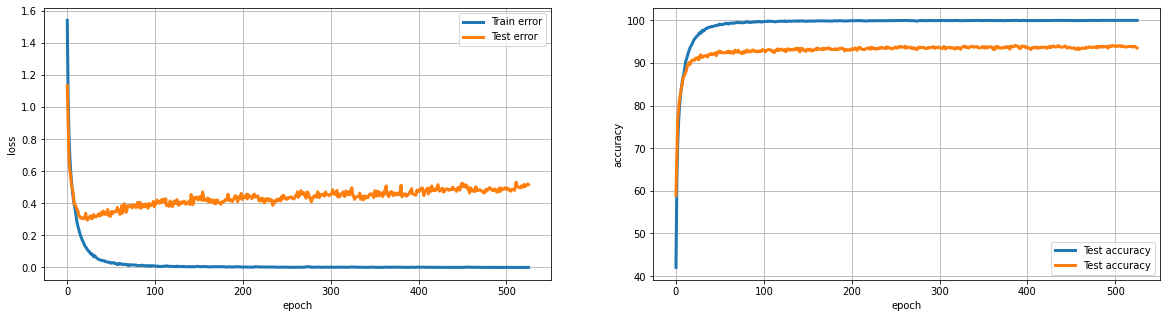

In [13]:
num_epochs = 526
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(range(num_epochs),train_loss_history,'-',linewidth=3,label='Train error')
plt.plot(range(num_epochs),test_loss_history,'-',linewidth=3,label='Test error')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.grid(True)
plt.legend()

plt.subplot(1,2,2)
plt.plot(range(num_epochs),train_accuracy_history,'-',linewidth=3,label='Test accuracy')
plt.plot(range(num_epochs),test_accuracy_history,'-',linewidth=3,label='Test accuracy')
# plt.plot(range(num_epochs),test_accuracy_history,'-',linewidth=3,label='Test accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.grid(True)
plt.legend()

In [14]:
print('Accuracy:',sum(test_accuracy_history[-5:])/5)

Accuracy: 93.7618670886076
